# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [3]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [4]:
filename= r"C:\Users\helix\Desktop\SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

In [5]:
import sklearn
print(sklearn.__version__)


1.5.1


### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [6]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [7]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [8]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

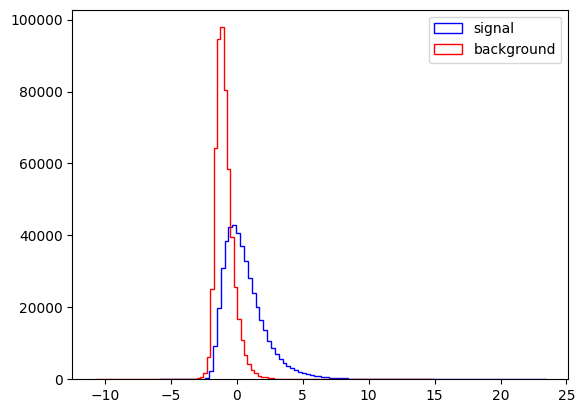

In [9]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

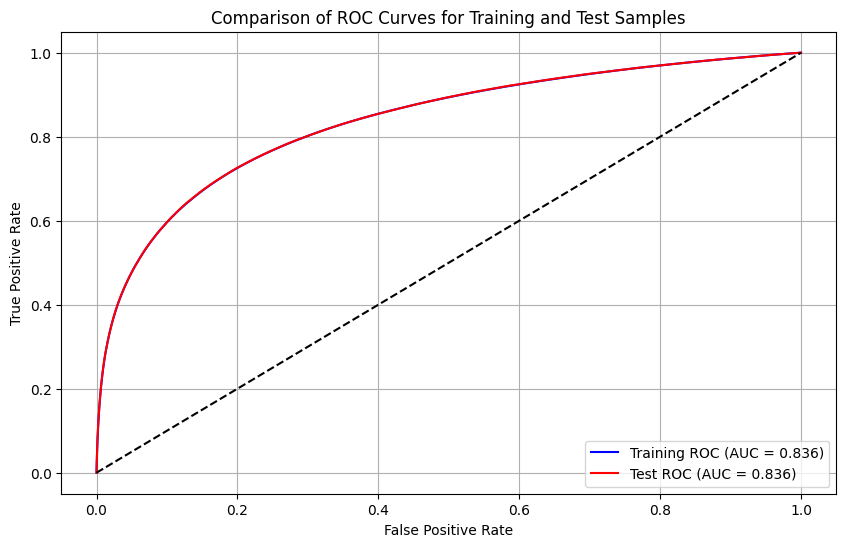

In [10]:
from sklearn.metrics import roc_curve, auc

# Compute the decision function values for training and testing samples
y_train_decision = Fisher.decision_function(X_Train)
y_test_decision = Fisher.decision_function(X_Test)

# Compute the ROC curve and AUC for training samples
fpr_train, tpr_train, _ = roc_curve(y_Train, y_train_decision)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute the ROC curve and AUC for test samples
fpr_test, tpr_test, _ = roc_curve(y_Test, y_test_decision)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot both ROC curves on a single plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {roc_auc_train:.3f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.3f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparison of ROC Curves for Training and Test Samples")
plt.legend(loc="lower right")
plt.grid()
plt.show()


#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

In [11]:
# Assuming these are the correct definitions from previous exercises
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", 
            "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

RawNames = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]

# Define FeatureNames as the set difference between VarNames[1:] and RawNames
FeatureNames = list(set(VarNames[1:]) - set(RawNames))


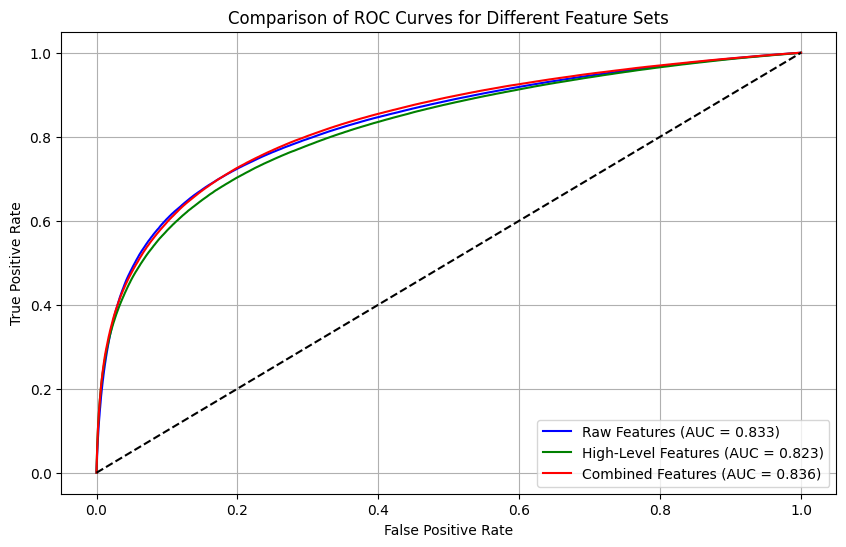

In [12]:
# Define the different sets of features
raw_features = RawNames
high_level_features = FeatureNames
combined_features = VarNames[1:]  # All features except the 'signal'

# Initialize the Fisher LDA classifier
Fisher = DA.LinearDiscriminantAnalysis()

# Train and test using raw features
X_train_raw = Train_Sample[raw_features]
y_train_raw = Train_Sample['signal']
X_test_raw = Test_Sample[raw_features]
y_test_raw = Test_Sample['signal']

Fisher.fit(X_train_raw, y_train_raw)
y_test_decision_raw = Fisher.decision_function(X_test_raw)

# Train and test using high-level features
X_train_high = Train_Sample[high_level_features]
y_train_high = Train_Sample['signal']
X_test_high = Test_Sample[high_level_features]
y_test_high = Test_Sample['signal']

Fisher.fit(X_train_high, y_train_high)
y_test_decision_high = Fisher.decision_function(X_test_high)

# Train and test using combined features
X_train_combined = Train_Sample[combined_features]
y_train_combined = Train_Sample['signal']
X_test_combined = Test_Sample[combined_features]
y_test_combined = Test_Sample['signal']

Fisher.fit(X_train_combined, y_train_combined)
y_test_decision_combined = Fisher.decision_function(X_test_combined)

# Compute ROC curves and AUC for each feature set
fpr_raw, tpr_raw, _ = roc_curve(y_test_raw, y_test_decision_raw)
roc_auc_raw = auc(fpr_raw, tpr_raw)

fpr_high, tpr_high, _ = roc_curve(y_test_high, y_test_decision_high)
roc_auc_high = auc(fpr_high, tpr_high)

fpr_combined, tpr_combined, _ = roc_curve(y_test_combined, y_test_decision_combined)
roc_auc_combined = auc(fpr_combined, tpr_combined)

# Plot the ROC curves for comparison
plt.figure(figsize=(10, 6))
plt.plot(fpr_raw, tpr_raw, label=f'Raw Features (AUC = {roc_auc_raw:.3f})', color='blue')
plt.plot(fpr_high, tpr_high, label=f'High-Level Features (AUC = {roc_auc_high:.3f})', color='green')
plt.plot(fpr_combined, tpr_combined, label=f'Combined Features (AUC = {roc_auc_combined:.3f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparison of ROC Curves for Different Feature Sets")
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [18]:
import logging
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger()

# Adjust the training dataset size
N_train = 400000

# Split the dataset
Train_Sample = df[:N_train]
Test_Sample = df[N_train:]

combined_features = VarNames[1:]  # Assuming VarNames has all features, except 'signal'

# Split into features and labels
X_train = Train_Sample[combined_features]
y_train = Train_Sample['signal']
X_test = Test_Sample[combined_features]
y_test = Test_Sample['signal']

# Define classifiers with progress options
classifiers = {
    "Logistic Regression": LogisticRegression(verbose=1, max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=50),
    "Decision Tree": DecisionTreeClassifier()
}

# Logging the start of the training process
for name, clf in classifiers.items():
    logger.info(f"Training {name}...")
    
    # Train the model directly
    clf.fit(X_train, y_train)
        
    logger.info(f"{name} trained successfully.")

# Now proceed with further analysis or testing


2024-11-10 21:03:52,824 - Training Logistic Regression...
2024-11-10 21:03:55,053 - Logistic Regression trained successfully.
2024-11-10 21:03:55,053 - Training Random Forest...
2024-11-10 21:08:05,281 - Random Forest trained successfully.
2024-11-10 21:08:05,289 - Training Decision Tree...
2024-11-10 21:08:36,632 - Decision Tree trained successfully.


2024-11-10 21:08:49,347 - Evaluating Logistic Regression...
2024-11-10 21:09:04,360 - Logistic Regression Metrics:
2024-11-10 21:09:04,360 -   - Accuracy: 0.788
2024-11-10 21:09:04,360 -   - Precision: 0.829
2024-11-10 21:09:04,360 -   - Recall: 0.677
2024-11-10 21:09:04,360 -   - F1 Score: 0.745
2024-11-10 21:09:04,360 -   - AUC: 0.858
2024-11-10 21:09:08,652 - Confusion Matrix for Logistic Regression:
[[2201614  293845]
 [ 680389 1424152]]
2024-11-10 21:09:08,660 - Evaluating Random Forest...
2024-11-10 21:12:43,076 - Random Forest Metrics:
2024-11-10 21:12:43,076 -   - Accuracy: 0.797
2024-11-10 21:12:43,076 -   - Precision: 0.823
2024-11-10 21:12:43,076 -   - Recall: 0.709
2024-11-10 21:12:43,076 -   - F1 Score: 0.761
2024-11-10 21:12:43,076 -   - AUC: 0.865
2024-11-10 21:12:46,329 - Confusion Matrix for Random Forest:
[[2174254  321205]
 [ 613396 1491145]]
2024-11-10 21:12:46,337 - Evaluating Decision Tree...
2024-11-10 21:13:06,001 - Decision Tree Metrics:
2024-11-10 21:13:06,001

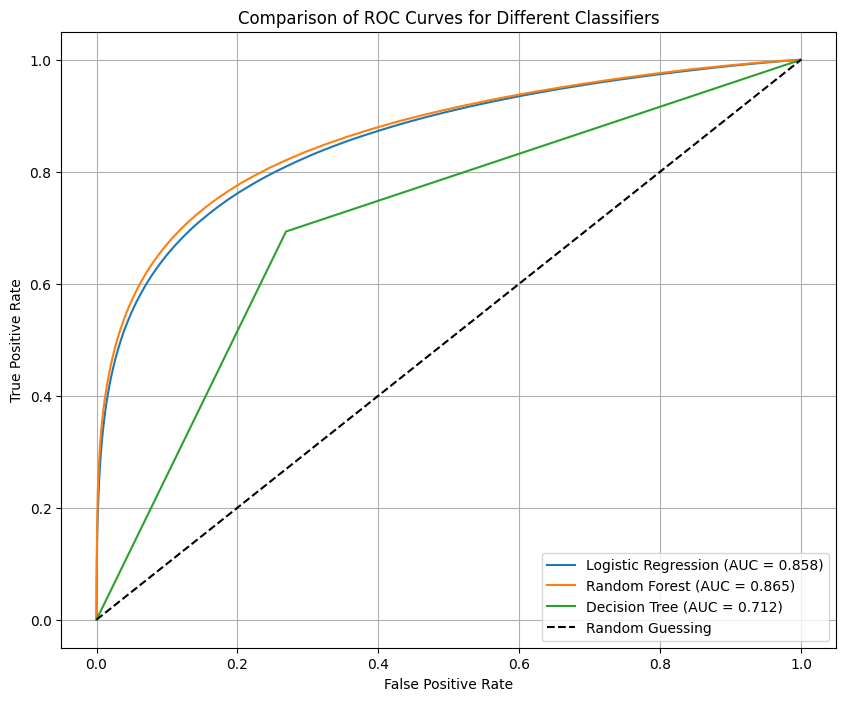

In [19]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dictionary to store the results
results = {}

# Iterate through each classifier
for name, clf in classifiers.items():
    logger.info(f"Evaluating {name}...")

    # Predict the probabilities for ROC curve
    y_pred_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test)

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Store results
    results[name] = {
        "fpr": fpr,
        "tpr": tpr,
        "roc_auc": roc_auc
    }

    # Print metrics
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    logger.info(f"{name} Metrics:")
    logger.info(f"  - Accuracy: {accuracy:.3f}")
    logger.info(f"  - Precision: {precision:.3f}")
    logger.info(f"  - Recall: {recall:.3f}")
    logger.info(f"  - F1 Score: {f1:.3f}")
    logger.info(f"  - AUC: {roc_auc:.3f}")

    # Print confusion matrix
    logger.info(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}")

# Plot ROC curves for all classifiers
plt.figure(figsize=(10, 8))
for name, result in results.items():
    plt.plot(result["fpr"], result["tpr"], label=f'{name} (AUC = {result["roc_auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparison of ROC Curves for Different Classifiers")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Maximum Significance: 1118.361
Optimal Threshold: 0.404


C:\Users\helix\AppData\Local\Temp\ipykernel_15792\3643855014.py:24: RuntimeWarning: invalid value encountered in divide
  significance = np.array(signal_counts) / np.sqrt(np.array(signal_counts) + np.array(background_counts))


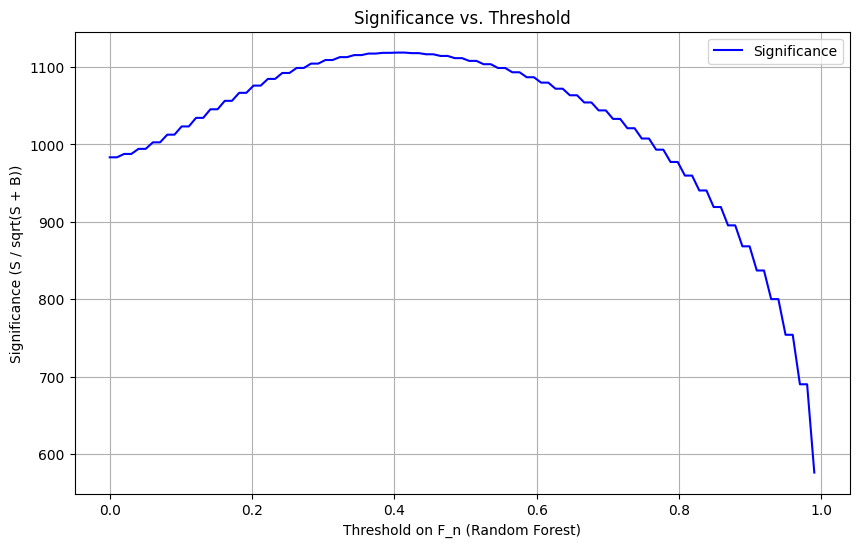

In [22]:
# Predict signal probabilities using the base Random Forest classifier
rf_probs = classifiers["Random Forest"].predict_proba(X_test)[:, 1]

# Define signal and background based on the true labels
sig_mask = (y_test == 1)
bkg_mask = (y_test == 0)

# Thresholds and counts
thresholds = np.linspace(0, 1, 100)
signal_counts = []
background_counts = []

for threshold in thresholds:
    signal_count = np.sum(rf_probs[sig_mask] > threshold)
    background_count = np.sum(rf_probs[bkg_mask] > threshold)
    signal_counts.append(signal_count)
    background_counts.append(background_count)

# Calculate significance for each threshold
significance = np.array(signal_counts) / np.sqrt(np.array(signal_counts) + np.array(background_counts))

# Find the maximum significance
max_significance = np.nanmax(significance)
optimal_threshold = thresholds[np.nanargmax(significance)]

print(f"Maximum Significance: {max_significance:.3f}")
print(f"Optimal Threshold: {optimal_threshold:.3f}")

# Plot the significance vs. threshold
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, significance, label="Significance", color="blue")
plt.xlabel("Threshold on F_n (Random Forest)")
plt.ylabel("Significance (S / sqrt(S + B))")
plt.title("Significance vs. Threshold")
plt.legend()
plt.grid()
plt.show()


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

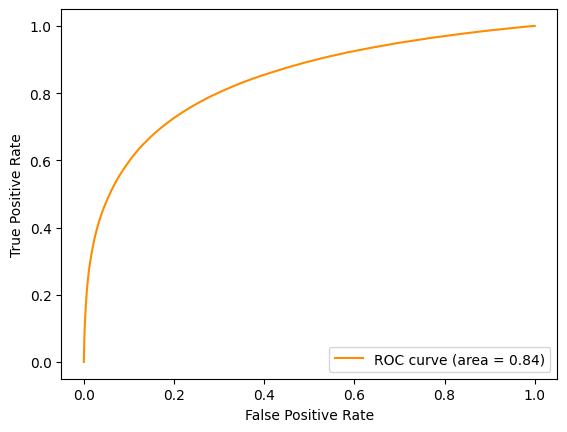

In [24]:
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [32]:
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Make predictions and compute probabilities for each classifier
results = []
for name, clf in classifiers.items():
    print(f"Calculating metrics for {name}...")
    
    # Predict probabilities or decision function
    if hasattr(clf, 'predict_proba'):
        y_pred_prob = clf.predict_proba(X_test)[:, 1]
    else:
        y_pred_prob = clf.decision_function(X_test)
    
    y_pred = clf.predict(X_test)
    
    # Compute TPR and FPR for ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Compute other metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate significance for the classifier
    thresholds = np.linspace(0, 1, 100)
    signal_counts = []
    background_counts = []

    sig_mask = (y_test == 1)
    bkg_mask = (y_test == 0)

    for threshold in thresholds:
        signal_count = np.sum(y_pred_prob[sig_mask] > threshold)
        background_count = np.sum(y_pred_prob[bkg_mask] > threshold)
        signal_counts.append(signal_count)
        background_counts.append(background_count)
    
    significance = np.array(signal_counts) / np.sqrt(np.array(signal_counts) + np.array(background_counts))
    max_significance = np.nanmax(significance)

    # Store the results
    results.append({
        "Classifier": name,
        "AUC": roc_auc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Accuracy": accuracy,
        "Maximal Significance": max_significance
    })

# Create a summary DataFrame
summary_df = pd.DataFrame(results)
print(summary_df)


Calculating metrics for Logistic Regression...


C:\Users\helix\AppData\Local\Temp\ipykernel_15792\1613344896.py:42: RuntimeWarning: invalid value encountered in divide
  significance = np.array(signal_counts) / np.sqrt(np.array(signal_counts) + np.array(background_counts))


Calculating metrics for Random Forest...


C:\Users\helix\AppData\Local\Temp\ipykernel_15792\1613344896.py:42: RuntimeWarning: invalid value encountered in divide
  significance = np.array(signal_counts) / np.sqrt(np.array(signal_counts) + np.array(background_counts))


Calculating metrics for Decision Tree...
            Classifier       AUC  Precision    Recall  F1 Score  Accuracy  \
0  Logistic Regression  0.857783   0.828961  0.676704  0.745134  0.788210   
1        Random Forest  0.865271   0.822769  0.708537  0.761392  0.796826   
2        Decision Tree  0.712122   0.684897  0.693212  0.689029  0.713729   

   Maximal Significance  
0           1106.367051  
1           1118.361003  
2            999.595425  


C:\Users\helix\AppData\Local\Temp\ipykernel_15792\1613344896.py:42: RuntimeWarning: invalid value encountered in divide
  significance = np.array(signal_counts) / np.sqrt(np.array(signal_counts) + np.array(background_counts))
